In [3]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 999.7 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [5]:
from ultralytics import YOLO
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import display, Image, Javascript
from PIL import Image as PILImage
import io

<IPython.core.display.Javascript object>

Saved to photo.jpg


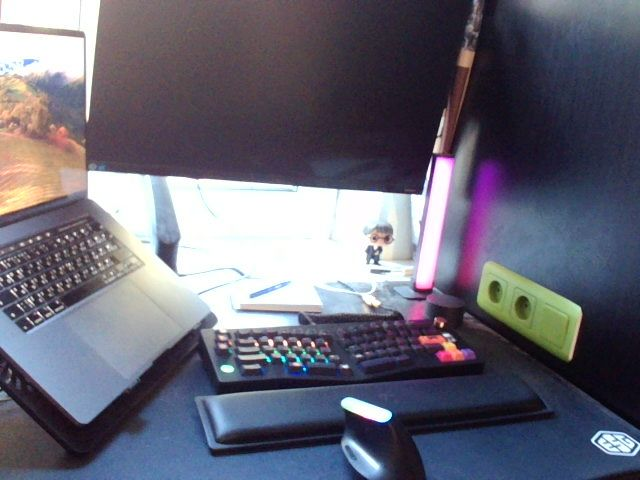

In [19]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

from IPython.display import Image

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Отображение
    display(Image(filename))
except Exception as err:
    print(f"Произошла ошибка: {str(err)}")


image 1/1 /content/photo.jpg: 480x640 2 tvs, 1 laptop, 1 mouse, 2 keyboards, 277.8ms
Speed: 4.9ms preprocess, 277.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


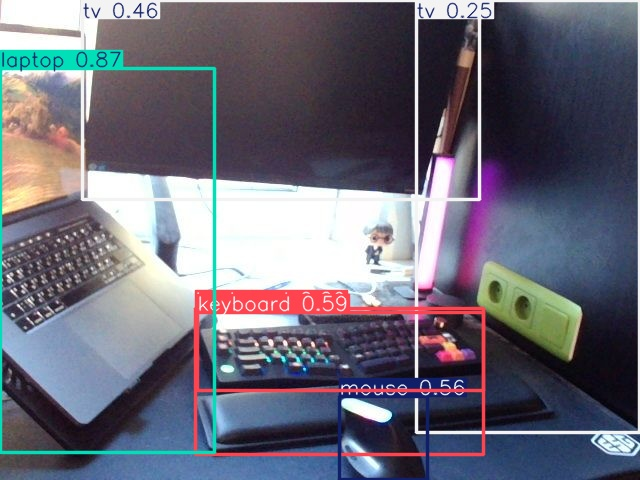

In [20]:
model = YOLO('yolov8n.pt')

def detect_objects(image_path):
    # Применение YOLO к изображению
    results = model(image_path)

    if isinstance(results, list):
        for result in results:
            result.show()
            output_image_path = '/content/output_image.jpg'
            result.save(output_image_path)
    else:
        results.show()
        output_image_path = '/content/output_image.jpg'
        results.save(output_image_path)

    return output_image_path

# Обработка изображения и отображение результатов
output_image_path = detect_objects(filename)
if output_image_path:
    display(Image(filename=output_image_path))